# GOAT Talk: The Best NBA Draft Class

### Introduction

Inside the NBA is the best show on TV. Well, it’s the best show if you love basketball. The Emmy Award-winning program follows the pre-game and post-game analysis of some of the NBA’s biggest games of the year. Hosted by Ernie Johnson, the show covers a variety of NBA topics including the input of the other studio analysts: former NBA champions Shaquille “Shaq” O’Neal and Kenny “The Jet” Smith. Oh, and some guy named Charles Barkley. What makes this show so compelling for basketball fans is the chemistry between the analysts. The show consists of 70% basketball, 25% talking non-sense (mostly trash talk) and 5% Ernie trying to get everyone to stay on topic. One second the crew will be talking about Game 2 of the Western Conference Finals, then switch over to talking about how often you should fill up your gas tank. Seriously, they spent 2 minutes talking about that!

One of the ongoing topics the Inside the NBA crew bring up in what seems like all the time is the debate of old school vs new school. Shaq, Kenny, and Charles will go on for days talking about how NBA players of their era were better, tougher, and blah blah blah. Now, I’m going to test that debate with data analysis. What better way to settle this debate with some Python! Okay, it might now sound like too much fun, but I'll try to make this analysis worth the time.

To conduct this analysis, we will only be looking at the 3 best NBA draft classes (not debatable): 1984, 1996, and 2003. Why? Well, they each have some of the greatest players of all time. 1984 has Hakeem Abdul Olajuwon, Charles Barkley, and of course Michael “GOAT” Jordan (debatable? Maybe). 1996 has Allen Iverson, Steve Nash, and Kobe Bryant. 2003 has Dwayne Wade, Chris Bosh, and LABron James (yes, I’m a Laker fan). Aside from being the best draft classes ever, these draft classes each represent different era’s of the NBA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
seasons = pd.read_csv('Seasons_Stats.csv')
years = list(range(1980,2018))
seasons = seasons[seasons['Year'].isin(years)]
seasons = seasons[seasons['MP'] > 500]
seasons = seasons[seasons['Tm'] != 'TOT']

players = pd.read_csv('player_data.csv')
years_draft = [1985, 1997, 2004]
players.columns = ['Player', 'Rookie Year', 'Final Year', 'Position', 'Height','Weight','DOB','College']
players = players[players['Rookie Year'].isin(years_draft)]


data = seasons[['Year', 'Player','G','MP','PER', 'TS%', 'FG%', '3P%','2P%', 'eFG%','OWS', 'DWS', 'WS', 'WS/48','USG%','OBPM', 'DBPM', 'BPM', 'VORP']]
data = data[data['Year'].isin(years)]
data['Year'] = data['Year'].astype(object)
data['Player'] = data['Player'].str.replace('*','')

In [4]:
combine = [data, players]

for item in combine:
    item['Player'] = item['Player'].str.replace('+','')
    item['Player'] = item['Player'].str.replace('*','')
    item['Player'] = item['Player'].str.replace('#','')
    item['Player'] = item['Player'].str.replace('~','')
    item['Player'] = item['Player'].str.replace('^','')
    item['Player'] = item['Player'].str.replace('>','')
    item['Player'] = item['Player'].str.replace('\d+','')
    item['Player'] = item['Player'].str.replace('[','')
    item['Player'] = item['Player'].str.replace(']','')
    item['Player'] = item['Player'].str.strip()

In [5]:
data_draft = players.merge(data, on = 'Player')

In [6]:
data_draft['Rookie Year'] = data_draft['Rookie Year'] - 1

In [7]:
f = {'G': ['sum'],'MP': ['sum'],'PER': ['mean'], 'TS%': ['mean'], 'FG%': ['mean'], '3P%': ['mean'],'2P%': ['mean'], 'eFG%': ['mean'],'OWS': ['mean'], 'DWS': ['mean'], 'WS': ['mean'], 
     'WS/48': ['mean'],'USG%': ['mean'],'OBPM': ['mean'], 'DBPM': ['mean'], 'BPM': ['mean'], 'VORP': ['mean']}
data_draft = data_draft.groupby(['Rookie Year'], as_index = False).agg(f)

Text(0,0.5,'PER')

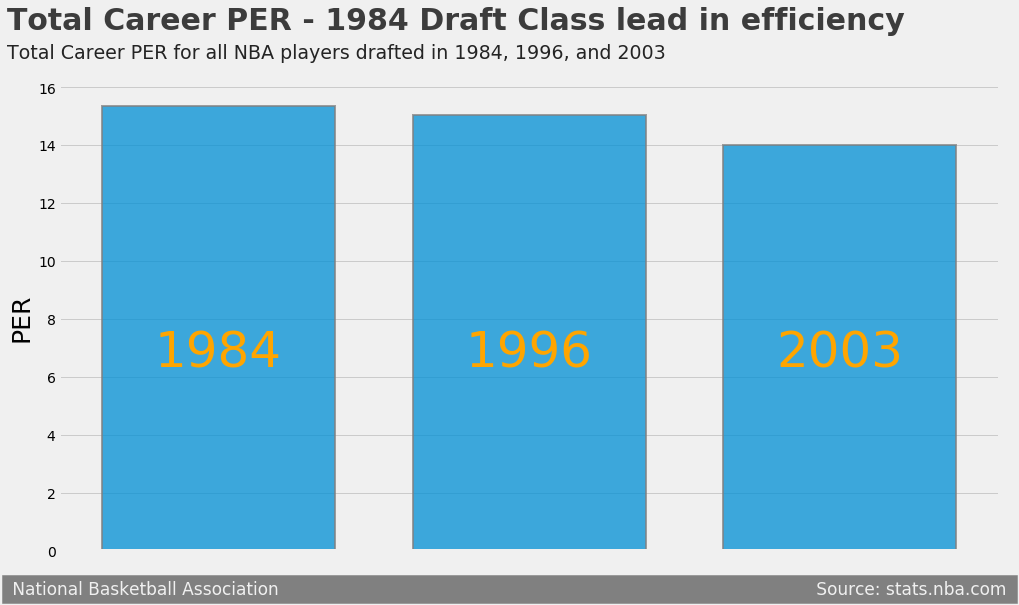

In [27]:
per = data_draft.sort_values([('PER','mean')], ascending = False).reset_index()
pos = list(range(len(per['PER','mean'])))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, per['PER','mean'], width = 0.75, alpha = 0.75, label = per['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos:
    plt.text(pos[i], 6, s = per['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size = 50)
plt.text(x = -0.68, y = 18, s = 'Total Career PER - 1984 Draft Class lead in efficiency',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.68, y = 17, s = 'Total Career PER for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.68, y = -1.5, s = ' National Basketball Association                                                                                                    Source: stats.nba.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('PER', size = 25)

Text(0,0.5,'VORP')

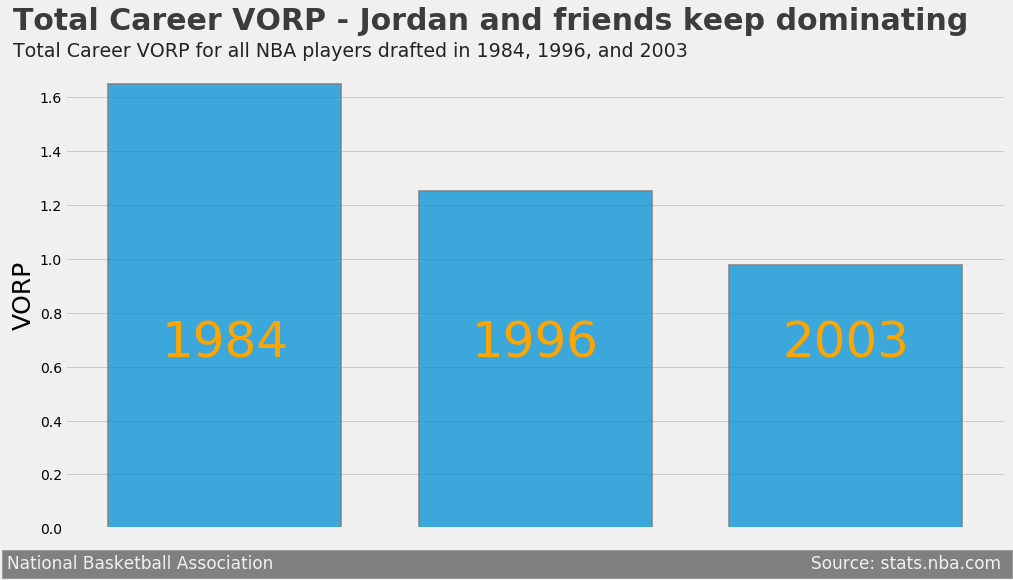

In [30]:
vorp = data_draft.sort_values([('VORP','mean')], ascending = False).reset_index()
pos1 = list(range(len(vorp['VORP','mean'])))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos1, vorp['VORP','mean'], width = 0.75, alpha = 0.75, label = vorp['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos1:
    plt.text(pos1[i], .6, s = vorp['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size = 50)
plt.text(x = -0.68, y = 1.85, s = 'Total Career VORP - Jordan and friends keep dominating',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.68, y = 1.75, s = 'Total Career VORP for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.7, y = -.15, s = 'National Basketball Association                                                                                                    Source: stats.nba.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('VORP', size = 25)

Text(0,0.5,'WS/48')

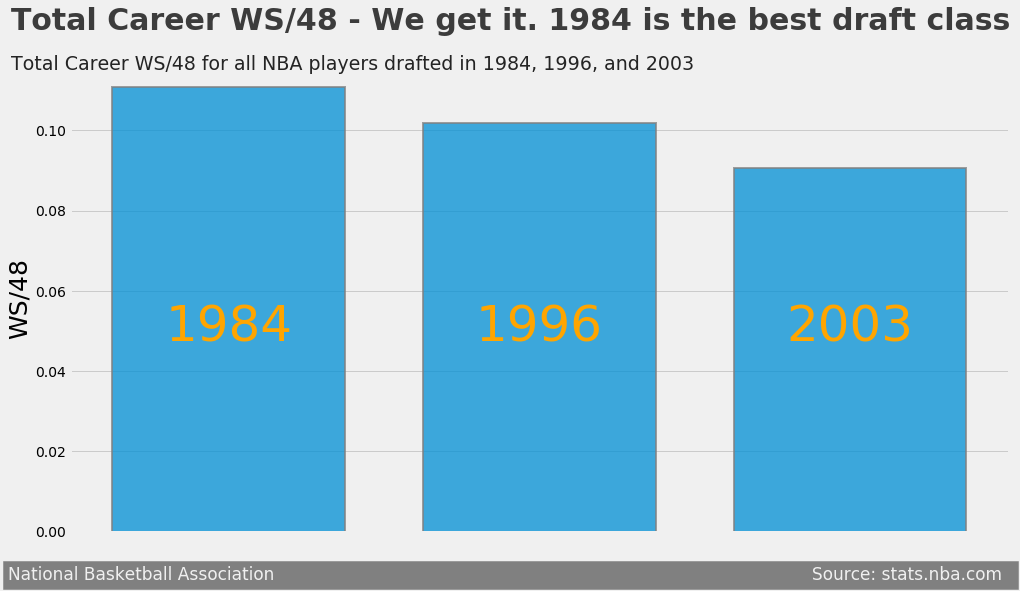

In [31]:
ws = data_draft.sort_values([('WS/48','mean')], ascending = False).reset_index()
pos = list(range(len(ws['WS/48','mean'])))

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, ws['WS/48','mean'], width = 0.75, alpha = 0.75, label = ws['Rookie Year'], edgecolor = 'gray', linewidth = 2)
for i in pos:
    plt.text(pos[i], 0.045, s = ws['Rookie Year'][i],ha='center', va='bottom', color = 'orange', size =50)

plt.text(x = -0.7, y = 0.125, s = 'Total Career WS/48 - We get it. 1984 is the best draft class',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -0.7, y = 0.115, s = 'Total Career WS/48 for all NBA players drafted in 1984, 1996, and 2003',fontsize = 19, alpha = .85)
plt.text(x = -0.71, y = -.012, s = 'National Basketball Association                                                                                                    Source: stats.nba.com  ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
ax.set_ylabel('WS/48', size = 25)